In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

from graphing_function_recent import total_seconds, rotate_trajectory, normalize_rotation, likelihood_check, dataframe_ranges, convert_time, audio_timing, time_set_zero, convert_data, single_mouse_data, displacement, speed, angle, angle_speed, trajectory, head_angle_trajectory_figure, speed_figure, displacement_figure, head_angle_figure, linearity_ratio, angle_speed_figure, escape_time, filter_data

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\V3_Tested2\coords_csv\CoordV3_M4_P2_6_21_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V3_updated\Timestamp\M4_P2_6_21_24_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V3_updated\Audio\M4_P2_6_21_24_audio.wav'

#input coordinates for the shelter and platform 
north_pixel = 26
south_pixel = 462
east_pixel = 570
west_pixel = 101
shelter_x_pixel = 140
shelter_y_pixel = 258

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 322.266 #stimulus start time
stimulus_end = 329.881 #stimulus end time
escape_done = 324 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,-19.491761,21.851823,0.995064,-20.929399,22.069131,0.998574,-21.580705,22.696020,...,0.999976,-22.191640,20.045060,0.999998,-22.740915,18.401603,0.999999,-22.880487,16.902295,0.999999
1,1,1,-19.456088,21.851823,0.995146,-20.869196,22.069131,0.999728,-21.478674,22.696020,...,0.999982,-22.175352,20.045060,0.999998,-22.740915,18.426794,0.999999,-22.880487,16.933976,0.999999
2,2,2,-18.897237,21.851823,0.997496,-20.612086,22.069131,0.999629,-21.139262,22.696020,...,0.999987,-22.157235,20.068757,0.999999,-22.683459,18.438442,0.999999,-22.880487,16.934774,0.999999
3,3,3,-18.358320,21.554355,0.999878,-20.278877,21.937382,0.999945,-20.677475,22.639379,...,0.999996,-22.015146,20.068757,0.999999,-22.683459,18.438442,0.999998,-22.932334,16.934774,0.999999
4,4,4,-17.916555,21.554355,0.999890,-19.945721,21.929027,0.999971,-20.386387,22.639379,...,0.999997,-21.766779,20.068757,0.999999,-22.646533,18.495963,0.999999,-22.935930,17.038809,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11417,11417,11417,-9.881257,27.055822,0.002463,-9.705746,29.976766,0.114681,-10.270310,30.854267,...,0.999941,-9.000174,28.855805,0.999998,-9.172717,27.533521,0.999995,-9.104835,26.232734,0.999996
11418,11418,11418,-9.881257,27.055822,0.001527,-9.705746,29.976766,0.251792,-10.275803,30.798770,...,0.999952,-9.000174,28.827719,0.999998,-9.188725,27.535152,0.999996,-9.104835,26.242926,0.999996
11419,11419,11419,-9.881257,27.055822,0.001897,-9.705746,29.976766,0.179032,-10.285619,30.854267,...,0.999941,-9.000174,28.811652,0.999998,-9.188725,27.535152,0.999995,-9.104835,26.242926,0.999996
11420,11420,11420,-9.881257,27.055822,0.000647,-9.705746,29.976766,0.262889,-10.285619,30.854267,...,0.999936,-9.015543,28.811652,0.999998,-9.211262,27.533521,0.999995,-9.104835,26.232734,0.999996


In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

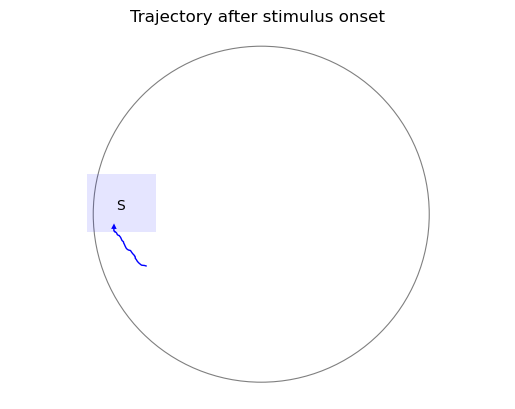

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

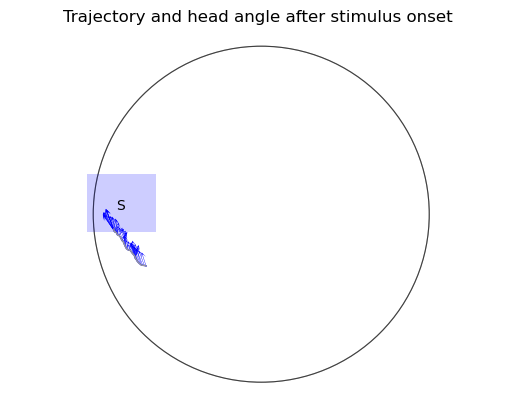

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

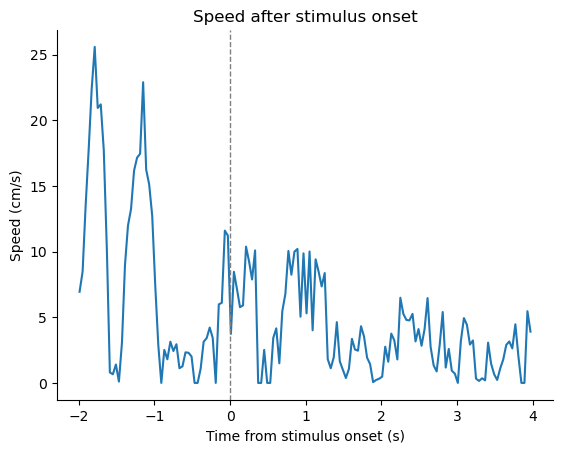

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

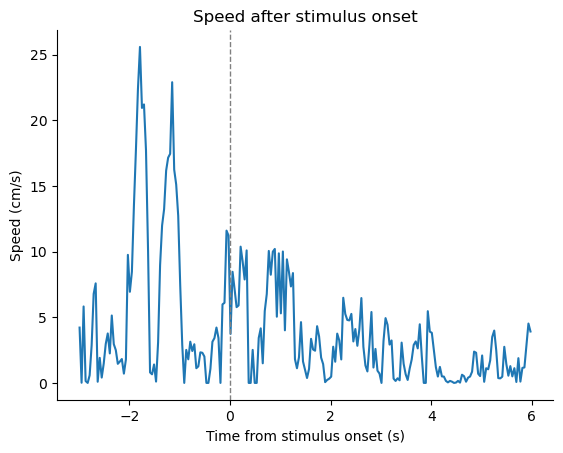

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

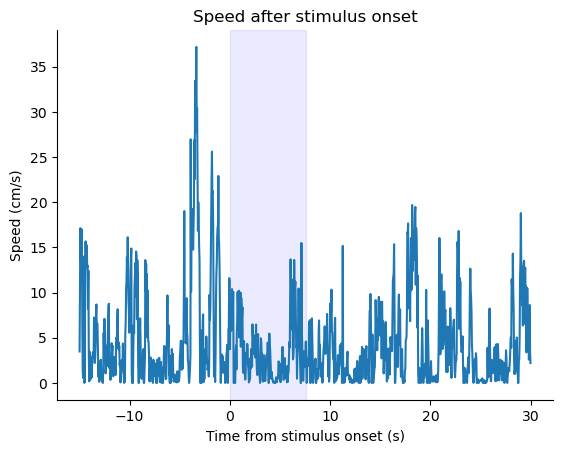

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

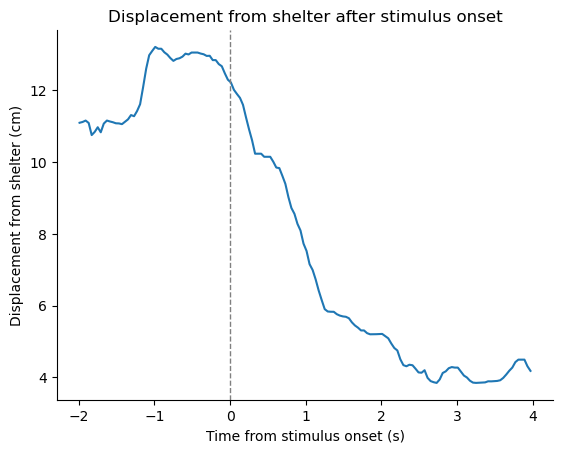

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

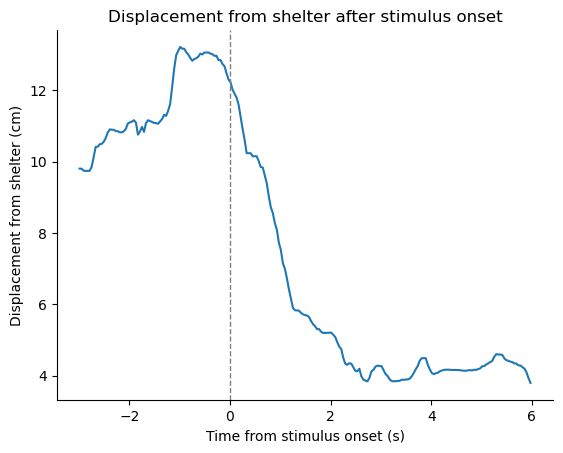

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

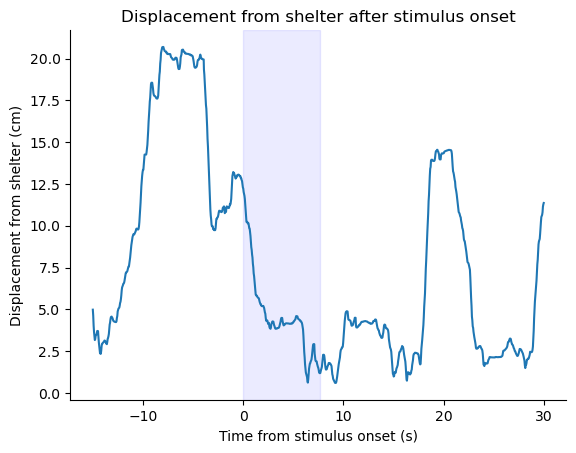

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

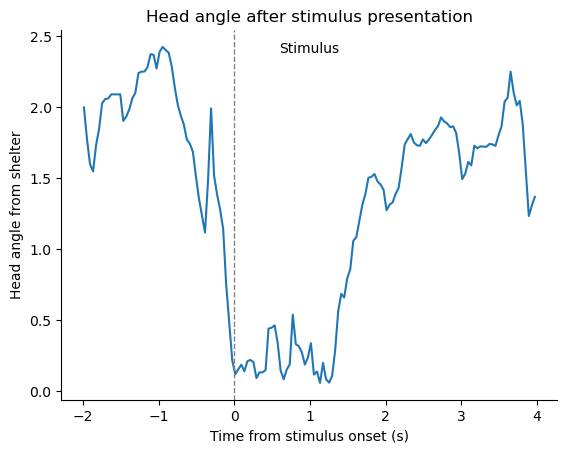

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

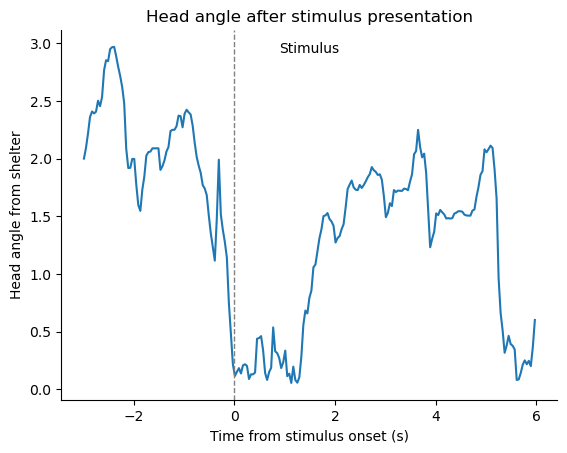

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

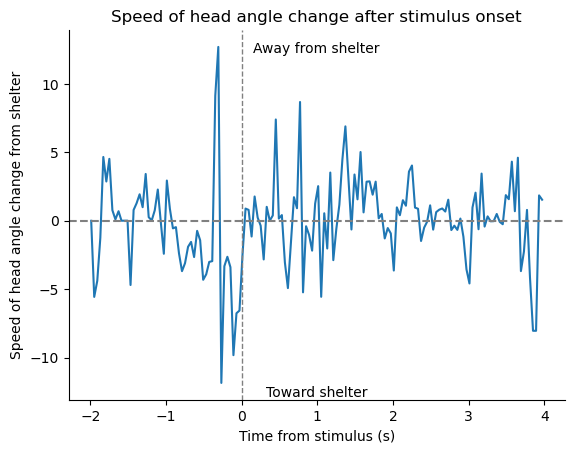

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [29]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
8055,8055,8055,-23.878860,-3.999170,0.772800,-24.138696,-4.970938,0.999978,-24.885589,-5.350579,...,-20.466288,-10.536781,0.999999,322.278336,0.490502,10.148783,0.000000,0.000000,0.445156,0.154724
8058,8058,8058,-24.440713,-3.909425,0.694488,-24.437528,-4.710393,0.999990,-25.156720,-5.061572,...,-20.640042,-10.435408,0.999999,322.398259,0.610425,9.848992,4.156880,0.165743,0.143389,-4.924516
8059,8059,8059,-24.851525,-3.815710,0.533306,-24.847227,-4.681242,0.999987,-25.485675,-5.061572,...,-20.701749,-10.289083,0.999999,322.438528,0.650694,9.832535,1.494382,0.060177,0.082204,-1.519415
8060,8060,8060,-25.262337,-3.721995,0.765468,-25.075126,-4.627896,0.999991,-25.669474,-5.061572,...,-20.811943,-10.080222,0.999999,322.478208,0.690374,9.620285,5.474519,0.217229,0.150340,1.717139
8061,8061,8061,-25.673150,-3.628279,0.523554,-25.511866,-4.546267,0.999991,-26.042624,-5.054937,...,-20.882467,-9.835053,0.999999,322.518285,0.730451,9.394212,6.773480,0.271461,0.186886,0.911889
8068,8068,8068,-26.723965,-1.800653,0.819526,-26.663139,-2.630807,0.999994,-27.345725,-3.118409,...,-22.409200,-8.406369,1.000000,322.798451,1.010617,7.522800,5.297948,0.212729,0.336134,2.525367
8069,8069,8069,-26.825031,-1.606896,0.366675,-27.016065,-2.407190,0.999991,-27.619014,-2.983146,...,-22.462916,-7.996546,1.000000,322.838285,1.050451,7.154388,10.010395,0.398754,0.114645,-5.560302
8070,8070,8070,-26.926096,-1.413140,0.477812,-27.149227,-2.294601,0.999989,-27.786146,-2.766830,...,-22.462916,-7.633898,1.000000,322.878861,1.091027,6.991804,4.006901,0.162584,0.136703,0.543635
8071,8071,8071,-27.027161,-1.219383,0.674865,-27.468637,-1.962042,0.999995,-28.158686,-2.466120,...,-22.674556,-7.304526,0.999999,322.918451,1.130617,6.731252,9.412633,0.372646,0.056342,-2.029834
8072,8072,8072,-27.128227,-1.025626,0.066324,-27.697166,-1.621257,0.999932,-28.300559,-2.193312,...,-22.985502,-7.098685,0.999999,322.958554,1.170720,6.420666,8.461912,0.339348,0.197446,3.518540


In [30]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

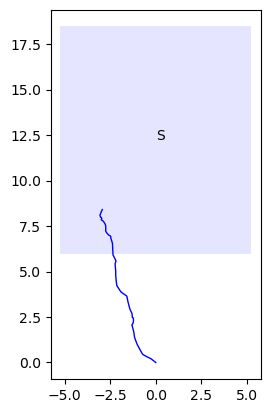

In [31]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


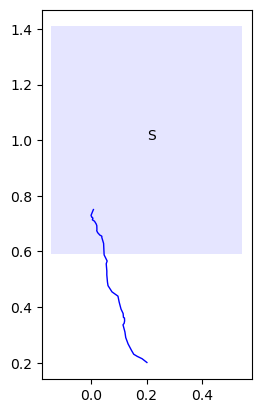

In [32]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

